<a href="https://colab.research.google.com/github/vaibhavb/zero-to-one-datascience-to-ai/blob/main/002_Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kaggle and Data Setup

In [1]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


Kaggle credentials set.
Kaggle credentials successfully validated.


In [3]:
titanic_path = kagglehub.competition_download('titanic')

print('Data source import complete.')

100%|██████████| 34.1k/34.1k [00:00<00:00, 28.8MB/s]

Extracting files...
Data source import complete.


# Import Dependencies and Data Set

In [5]:
import numpy as np
import pandas as pd
import os

In [6]:
train_df = pd.read_csv(titanic_path + "/train.csv")

# Handling Missing Data

In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Strategies
* **Dropping:**
  * Drop the whole row: If a row has too many missing values or if the missing value is in a crucial column for a specific analysis.
  * Drop the whole column: If a column has too many missing values to be useful (e.g., `Cabin`).
* **Imputing:** Filling in the missing values.
  * For numerical data: Use mean, median (more robust to outliers), or mode.
  * For categorical data: Use mode (most frequent category).
  * More advanced: Use a model to predict missing values (e.g., k-NN imputation).

## Apply Strategies

### Cabin

In [9]:
df_processed = train_df.copy()
# drop the 'Cabin'
df_processed.drop('Cabin', axis=1, inplace=True)
print(df_processed.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64


### Age
This numerical column has some missing values. Let's impute with the median age, which is less sensitive to outliers than the mean.

In [11]:
median_age = df_processed['Age'].median()
df_processed.fillna({'Age': median_age}, inplace=True)
print(f"\nMissing 'Age' values imputed with median: {median_age}")
print("Missing values in 'Age' after imputation:")
print(df_processed['Age'].isnull().sum())


Missing 'Age' values imputed with median: 28.0
Missing values in 'Age' after imputation:
0


### Embarked
This categorical column has only a couple of missing values. Let's impute with the mode (most frequent port).


In [13]:
mode_embarked = df_processed['Embarked'].mode()[0] # .mode() returns a Series, so we take the first element
df_processed.fillna({'Embarked': mode_embarked}, inplace=True)
print(df_processed['Embarked'].isnull().sum())

0


In [14]:
print("\nFinal check for missing values in df_processed:")
print(df_processed.isnull().sum())



Final check for missing values in df_processed:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


# Visualizing Data to Understand Survival 📈
Visualizations are powerful tools for uncovering relationships. We'll use `matplotlib` and `seaborn`.


## Initialize

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a nice style for the plots
sns.set(style="whitegrid")


## Distribution?
Discussion: Is it balanced?

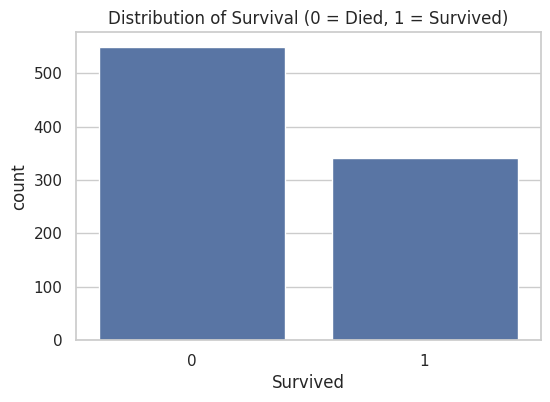

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


In [16]:
if 'df_processed' in locals():
    plt.figure(figsize=(6,4))
    sns.countplot(x='Survived', data=df_processed)
    plt.title('Distribution of Survival (0 = Died, 1 = Survived)')
    plt.show() # Essential for displaying plots in script/Canvas environment
    print(df_processed['Survived'].value_counts(normalize=True)) # Percentage


## Categorical Features vs Survival
 `sns.barplot` or `sns.catplot` (with `kind="bar"`) are good for comparing a numerical value (like mean survival rate) across categories.


### Sex vs Survived?

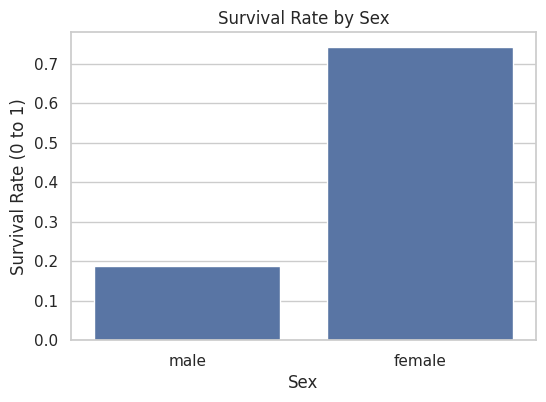

In [17]:
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df_processed, errorbar=None) # errorbar=None for cleaner plot
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate (0 to 1)')
plt.show()

### Pclass vs Survived?

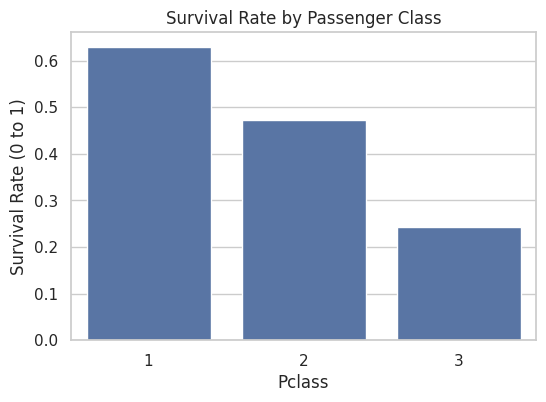

In [18]:
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df_processed, errorbar=None)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate (0 to 1)')
plt.show()


### Embarked vs. Survived?

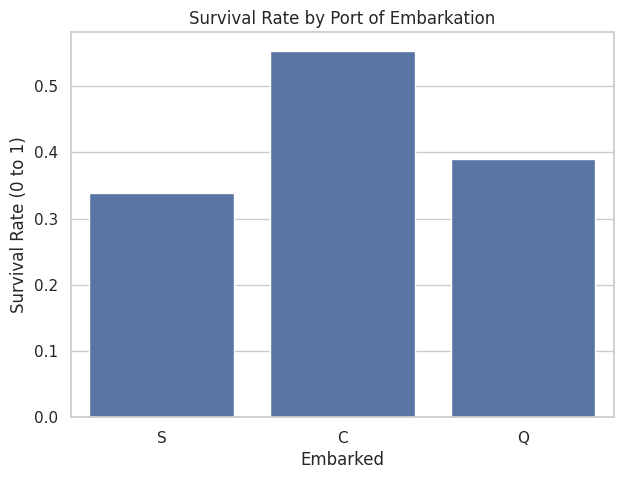

In [19]:
plt.figure(figsize=(7,5))
sns.barplot(x='Embarked', y='Survived', data=df_processed, errorbar=None)
plt.title('Survival Rate by Port of Embarkation')
plt.ylabel('Survival Rate (0 to 1)')
plt.show()

## Numerical Features vs Survival?
`sns.histplot` with `hue='Survived'` can show distributions for different outcomes. `sns.kdeplot` can show smoothed distributions.`sns.boxplot` or `sns.violinplot` can compare distributions.

### Age vs Survived

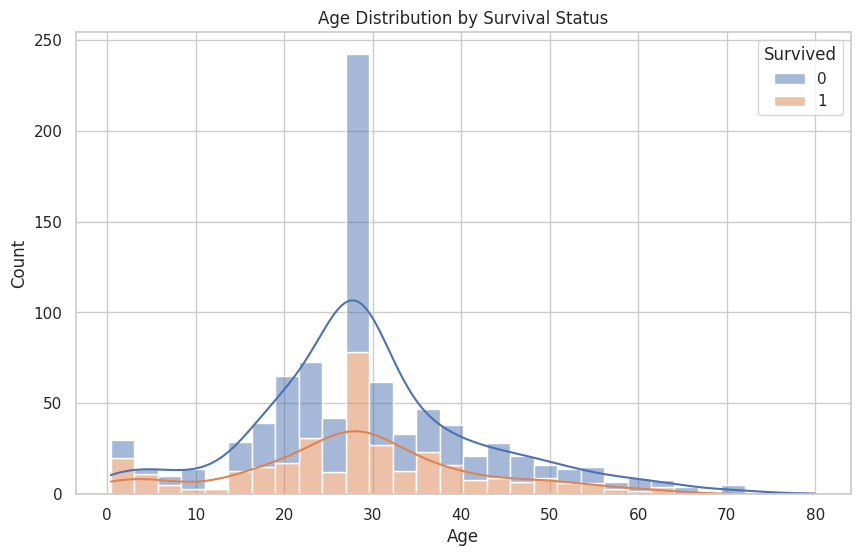

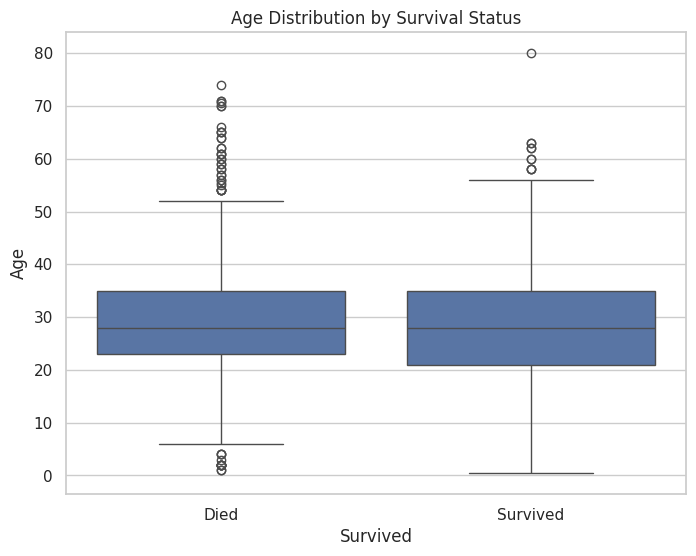

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_processed, x='Age', hue='Survived', multiple="stack", kde=True)
plt.title('Age Distribution by Survival Status')
plt.xlabel('Age')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df_processed)
plt.title('Age Distribution by Survival Status')
plt.xticks([0,1], ['Died', 'Survived']) # Ensure correct labels for x-axis ticks
plt.show()

*Hypothesis: Younger children had a higher survival rate. Very old passengers might have had lower survival. The median age of survivors might be slightly lower.*

### Fare vs Survived?
Fare is skewed, so a log transformation or careful binning might be useful for some plots, but let's try a boxplot and KDE first.


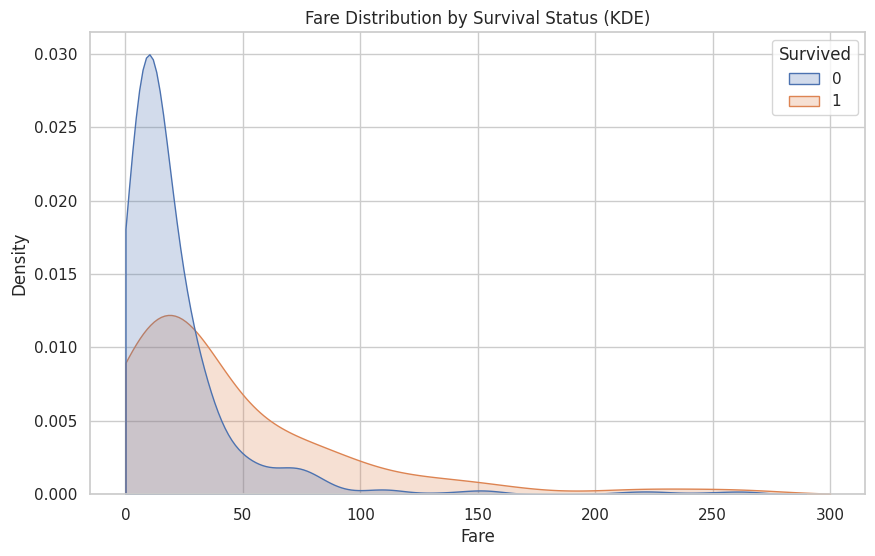

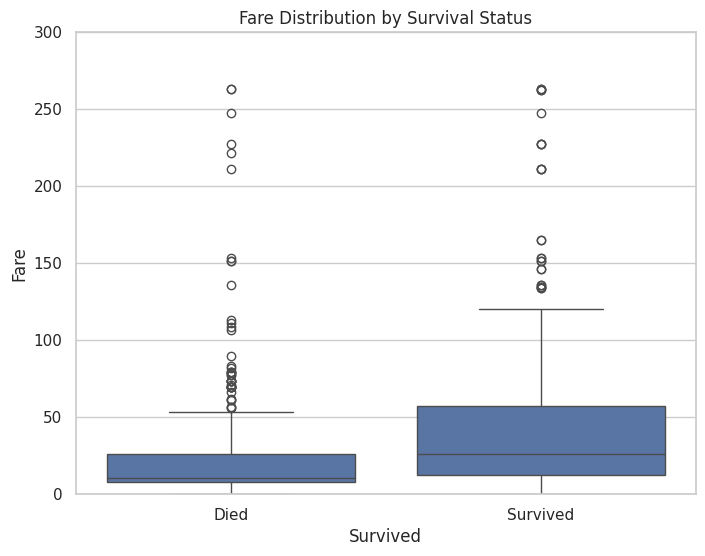

In [23]:
plt.figure(figsize=(10, 6))
# Using common_norm=False for KDE to show shapes independently
sns.kdeplot(data=df_processed, x='Fare', hue='Survived', fill=True, common_norm=False, clip=(0,300)) # clip to see main part
plt.title('Fare Distribution by Survival Status (KDE)')
plt.xlabel('Fare')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=df_processed)
plt.title('Fare Distribution by Survival Status')
plt.xticks([0,1], ['Died', 'Survived']) # Ensure correct labels for x-axis ticks
plt.ylim(0, 300) # Zoom in on the majority of fares for better visualization
plt.show()

*Hypothesis: Passengers who paid higher fares were more likely to survive.*


# Initial Feature Engineering
Feature engineering is the process of creating new features from existing ones to potentially improve model performance.

## FamilySize
Combine `SibSp` (siblings/spouses) and `Parch` (parents/children).


In [24]:
df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1 # +1 for the passenger themselves

print("\nFirst 5 rows with 'FamilySize':")
# Ensure 'Survived' column exists if you want to print it here, or handle its absence
if 'Survived' in df_processed.columns:
    print(df_processed[['SibSp', 'Parch', 'FamilySize', 'Survived']].head())
else:
    print(df_processed[['SibSp', 'Parch', 'FamilySize']].head())


First 5 rows with 'FamilySize':
   SibSp  Parch  FamilySize  Survived
0      1      0           2         0
1      1      0           2         1
2      0      0           1         1
3      1      0           2         1
4      0      0           1         0


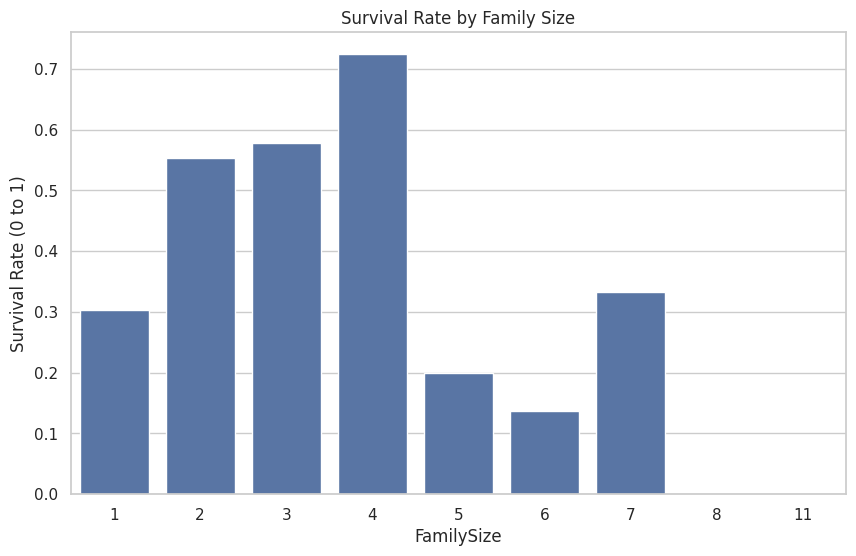

In [25]:
plt.figure(figsize=(10,6))
sns.barplot(x='FamilySize', y='Survived', data=df_processed, errorbar=None)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate (0 to 1)')
plt.show()

*Discussion: How does family size relate to survival? (e.g., being alone or in a very large family might be detrimental. Small families might have fared better).*


## IsAlone?
A binary feature indicating if the passenger was traveling alone (FamilySize = 1).


First 5 rows with 'IsAlone':
   FamilySize  IsAlone  Survived
0           2        0         0
1           2        0         1
2           1        1         1
3           2        0         1
4           1        1         0


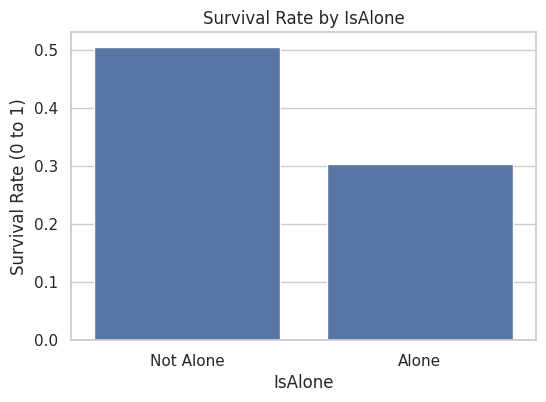

In [26]:
df_processed['IsAlone'] = 0 # Initialize with 0 (Not Alone)
df_processed.loc[df_processed['FamilySize'] == 1, 'IsAlone'] = 1 # Set to 1 where FamilySize is 1

print("\nFirst 5 rows with 'IsAlone':")
if 'Survived' in df_processed.columns:
    print(df_processed[['FamilySize', 'IsAlone', 'Survived']].head())
else:
    print(df_processed[['FamilySize', 'IsAlone']].head())


if 'Survived' in df_processed.columns:
    plt.figure(figsize=(6,4))
    sns.barplot(x='IsAlone', y='Survived', data=df_processed, errorbar=None)
    plt.title('Survival Rate by IsAlone')
    plt.xticks([0,1], ['Not Alone', 'Alone']) # Ensure correct labels for x-axis ticks
    plt.ylabel('Survival Rate (0 to 1)')
    plt.show()


# Other Features?
The `Name` column contains titles like "Mr.", "Mrs.", "Miss.", "Master.", etc. These could be powerful.
* "Master." usually indicates a young male child.
* "Miss." can indicate an unmarried female (potentially younger).
* "Mrs." indicates a married female.
* Other titles ("Dr.", "Rev.", "Col.") might indicate status or profession.
Extracting these titles could be a good feature. We would use string processing (e.g., regular expressions) for this.
